# Criando Faixas de Valor

In [1]:
import pandas as pd

In [3]:
dataset = pd.read_csv('dados/alugueis_residencial_tratado_melhorado.csv', sep =';')
dataset.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Casa
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [4]:
#criando uma lista com as faixas, 1 a 2, 3 a 4 ...
faixas = [0,2,4,6,100]

In [6]:
#Cria uma matriz categorizada com as faixas
quartos = pd.cut(dataset['Quartos'], faixas)
quartos

0        (0.0, 2.0]
1        (0.0, 2.0]
2        (0.0, 2.0]
3        (0.0, 2.0]
4        (0.0, 2.0]
            ...    
22348    (0.0, 2.0]
22349           NaN
22350    (2.0, 4.0]
22351    (0.0, 2.0]
22352    (0.0, 2.0]
Name: Quartos, Length: 22353, dtype: category
Categories (4, interval[int64, right]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

In [7]:
#Mostra a frequencia de cada faixa de quartos
# ( = intervalo aberto, ou seja, vai começar do valor depois. EX: (0 = vai começar do 1
# ] = intervalo fechado, logo termina no valor presente. EX: 2] = vai até o 2 
quartos.value_counts()

(0, 2]      11772
(2, 4]       9685
(4, 6]        686
(6, 100]       50
Name: Quartos, dtype: int64

In [12]:
#Criar labels para deixar mais organizados
label = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais']
quartos = pd.cut(dataset['Quartos'], faixas, labels= label)
quartos.value_counts()

1 e 2 quartos        11772
3 e 4 quartos         9685
5 e 6 quartos          686
7 quartos ou mais       50
Name: Quartos, dtype: int64

In [21]:
# se quiser pegar valores antes do intervalo aberto por exemplo o 0
label = ['0, 1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais']
quartos2 = pd.cut(dataset['Quartos'], faixas, labels= label, include_lowest= True)
quartos2_frequencia = quartos2.value_counts()
quartos2_frequencia

0, 1 e 2 quartos     11932
3 e 4 quartos         9685
5 e 6 quartos          686
7 quartos ou mais       50
Name: Quartos, dtype: int64

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Números de Quartos')

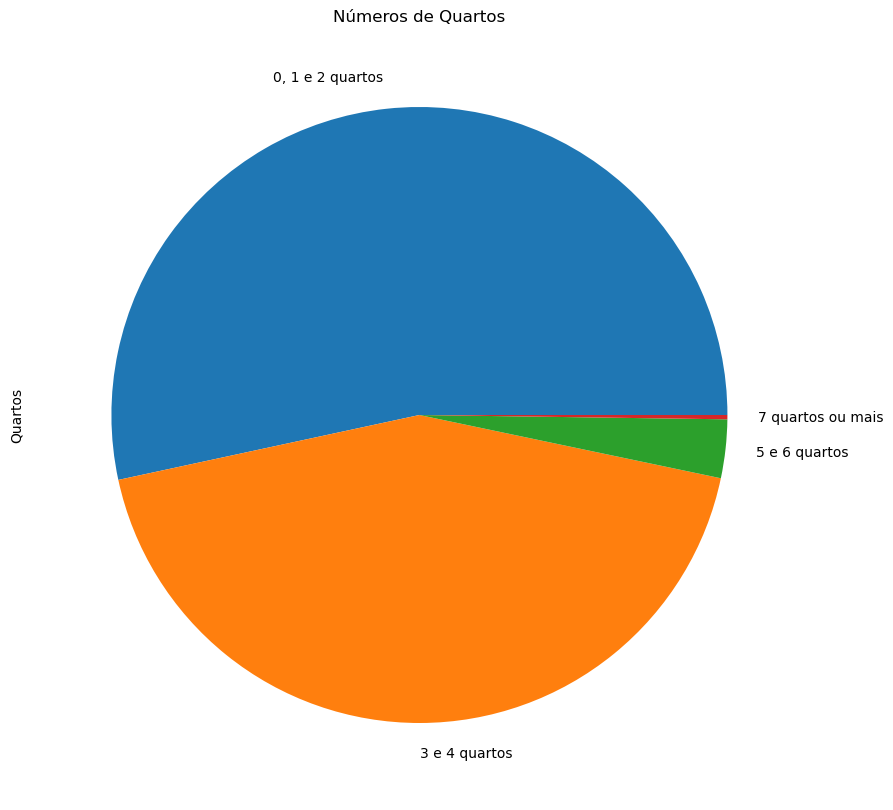

In [28]:
grafico = quartos2_frequencia.plot.pie()
grafico.set_title('Números de Quartos')